## Predicting UK Not News by URL pattern

We predict not news using URL structure.

Bakshy et al. for instance use the following logic:

	hard_lab    Indicates whether the url (below) matches the regex: 'politi|usnews|world|national|state|elect|vote|govern|campaign|war|polic|econ|unemploy|racis|energy|abortion|educa|healthcare|immigration'
	soft_lab    Indicates whether the url matches the regex: 'sports|entertainment|arts|fashion|style|lifestyle|leisure|celeb|movie|music|gossip|food|travel|horoscope|weather|gadget'


The scheme is based on U.S. data so not as useful for U.K. data. After carefully inspecting a random sample of thousand URLs, we came up with the following:
    
	hard_lab    Indicates whether the url (below) matches the regex: 'politi|world|national|state|elect|vote|govern|campaign|war|polic|econ|unemploy|energy|educa|healthcare|immigration'
	soft_lab    Indicates whether the url matches the regex: 'sports|entertainment|arts|fashion|style|lifestyle|leisure|celeb|movie|music|gossip|food|travel|horoscope|weather|gadget'

p.s. 'soft_lab' means not news.

### Read in the data

In [1]:
import pandas as pd

pd.set_option("display.max_colwidth", 120)

In [2]:
df = pd.read_csv(
    "/opt/notebooks/not_news/tabs/uk_news_media_data_subset_by_label.csv.gz",
    usecols=["label", "url", "text"],
)
df["src_name"] = df["label"].str.lower()
del df["label"]
df.head()

,text,url,src_name
0,highpressur day work drink pint locallybrew real ale mani peopl prefer way relax anaesthetist aldebi near beccl turn...,http://www.becclesandbungayjournal.co.uk/content/bbjournal/news/story.aspx?brand=BBJOnline&category=NEWS&tBrand=bbjo...,beccles and bungay journal
1,weather forecast remain extrem cold come day suffolk counti council extend usual custom servic helplin oper weekend ...,http://www.becclesandbungayjournal.co.uk/content/bbjournal/news/story.aspx?brand=BBJOnline&category=NEWS&tBrand=bbjo...,beccles and bungay journal
2,elderli vulner peopl live council hous waveney protect new crackdown antisoci behaviour waveney district council new...,http://www.becclesandbungayjournal.co.uk/content/bbjournal/news/story.aspx?brand=BBJOnline&category=NEWS&tBrand=bbjo...,beccles and bungay journal
3,villag award energysav project set spend reduc fuel bill whole commun wenhaston south halesworth name one greenest v...,http://www.becclesandbungayjournal.co.uk/content/bbjournal/news/story.aspx?brand=BBJOnline&category=NEWS&tBrand=bbjo...,beccles and bungay journal
4,tuesday saw first beccl v bungay golf match year produc ace beccl play home led ladi captain sam cooper partner club...,http://www.becclesandbungayjournal.co.uk/content/bbjournal/sport/story.aspx?brand=BBJOnline&category=SPORT&tBrand=bb...,beccles and bungay journal


In [3]:
df.shape[0]

5392953

### Generate Labels

In [4]:
import re

hard_lab = re.compile(
    "(politi|world|national|uk-news|scottish-news|news-eu|state|local|elect|vote|govern|campaign|war|polic|econ|unemploy|energy|educa|healthcare|immigration)"
)
soft_lab = re.compile(
    "(sport|football|entertainment|culture|arts|fashion|style|lifestyle|life-style|leisure|celeb|movie|music|gossip|food|travel|horoscope|weather|gadget)"
)

### Create Training Data

In [5]:
sdf = df[df.text.notnull() & df.url.notnull()].sample(1000000, random_state=4).copy()
sdf.head()

,text,url,src_name
1294994,man name local geraint evan appear aberdar magistr court accus murder father paul bennett father two stab death grou...,http://www.peterboroughet.co.uk/viewarticle.aspx?articleid=2126845&sectionid=406,peterborough evening telegraph
2453364,lead polic chief today condemn armchair perfect health safeti taliban prevent offic carri job say put live risk sir ...,"http://www.guardian.co.uk/Politics/homeaffairs/story/0,,2206622,00.htm",the guardian
121854,west brom bolton took point live barclay premier leagu encount hawthorn wander went front midway second half thank s...,http://www.birminghammail.net/birmingham-sport/west-bromwich-albion-fc/west-bromwich-albion-fc-news/2010/10/02/west-...,birmingham mail
1077388,east england ambul servic norwich offic hellesdon east england ambul servic norwich offic hellesdon solar panel inst...,http://www.edp24.co.uk/solar_panels_installed_at_norwich_ambulance_control_room_1_225106,eastern daily press
2926234,wit say man went stab spree belgian nurseri face paint like joker two babi carer die attack ten children treat hospi...,http://www.belfasttelegraph.co.uk/breaking-news/world/europe/belgian-nursery-killer-painted-face-like-the-joker-1415...,belfast telegraph


In [6]:
# Free up memory
import gc

%xdel df
gc.collect()

80

In [7]:
def is_hard_lab(c):
    m = hard_lab.search(c)
    return 1 if m else None


sdf["hard_lab"] = sdf["url"].apply(lambda c: is_hard_lab(c))
sdf[sdf.hard_lab == 1].head()

,text,url,src_name,hard_lab
1294994,man name local geraint evan appear aberdar magistr court accus murder father paul bennett father two stab death grou...,http://www.peterboroughet.co.uk/viewarticle.aspx?articleid=2126845&sectionid=406,peterborough evening telegraph,1.0
2926234,wit say man went stab spree belgian nurseri face paint like joker two babi carer die attack ten children treat hospi...,http://www.belfasttelegraph.co.uk/breaking-news/world/europe/belgian-nursery-killer-painted-face-like-the-joker-1415...,belfast telegraph,1.0
2950250,monday januari local news member ahmadiyya muslim youth associ member ahmadiyya muslim youth associ member ahmadiyya...,http://www.croydonguardian.co.uk/news/localnews/10175440.Muslim_group_pitches_in_to_clear_snow/?ref=rs,croydon guardian,1.0
5005952,england face prospect follow india oval anoth lowerord bat collaps face task score final match seri ensur indian bat...,http://www.skegnesstoday.co.uk/latest-national-sport?articleid=310453,skegness today,1.0
3827845,polic today reveal lead forc new neighbourhood team follow costcut shakeup commun beat dian bradburi number individu...,http://www.newsandstar.co.uk/news/cumbria-police-reveals-inspectors-in-charge-of-force-s-new-local-teams-1.799776?re...,news & star,1.0


In [8]:
def is_soft_lab(c):
    m = soft_lab.search(c)
    return 1 if m else None


sdf["soft_lab"] = sdf["url"].apply(lambda c: is_soft_lab(c))
sdf[sdf.soft_lab == 1].head()

,text,url,src_name,hard_lab,soft_lab
121854,west brom bolton took point live barclay premier leagu encount hawthorn wander went front midway second half thank s...,http://www.birminghammail.net/birmingham-sport/west-bromwich-albion-fc/west-bromwich-albion-fc-news/2010/10/02/west-...,birmingham mail,NaN,1.0
5005952,england face prospect follow india oval anoth lowerord bat collaps face task score final match seri ensur indian bat...,http://www.skegnesstoday.co.uk/latest-national-sport?articleid=310453,skegness today,1.0,1.0
2184529,coast downhil gear cheaper honest john explain coast downhil gear cheaper fuel effici gearbox engag honest john bst ...,http://telegraph.feedsportal.com/c/32726/f/568313/s/161c1511/l/0L0Stelegraph0O0Cmotoring0Ccaradvice0Chonestjohn0C859...,the daily telegraph,NaN,1.0
3160926,villa seal collin deal sep aston villa complet sign west ham defend jame collin fouryear contract welsh intern put p...,http://www.examiner.co.uk/news/national-sport/2009/09/01/villa-seal-collins-deal-86081-24582146,the huddersfield daily examiner,1.0,1.0
5224091,late show delight lambert sunday januari nation sport news press associ skip social link print email tweet paul lamb...,http://www.somersetcountygazette.co.uk/uk_national_sport/9446365.Late_show_delights_Lambert/?ref=rs,somerset county gazette,1.0,1.0


### Filter on rows where hard and soft labels are different

We ignore URLs that have both keywords.

In [9]:
sdf.loc[(sdf.hard_lab == 1) & (sdf.soft_lab.isnull()), "soft_news"] = 0
sdf.loc[(sdf.hard_lab.isnull()) & (sdf.soft_lab == 1), "soft_news"] = 1

### Final Dataset

In [10]:
sdf = sdf[sdf.soft_news.notnull()]
sdf = sdf.reset_index(drop=True)
sdf.head()

,text,url,src_name,hard_lab,soft_lab,soft_news
0,man name local geraint evan appear aberdar magistr court accus murder father paul bennett father two stab death grou...,http://www.peterboroughet.co.uk/viewarticle.aspx?articleid=2126845&sectionid=406,peterborough evening telegraph,1.0,NaN,0.0
1,west brom bolton took point live barclay premier leagu encount hawthorn wander went front midway second half thank s...,http://www.birminghammail.net/birmingham-sport/west-bromwich-albion-fc/west-bromwich-albion-fc-news/2010/10/02/west-...,birmingham mail,NaN,1.0,1.0
2,wit say man went stab spree belgian nurseri face paint like joker two babi carer die attack ten children treat hospi...,http://www.belfasttelegraph.co.uk/breaking-news/world/europe/belgian-nursery-killer-painted-face-like-the-joker-1415...,belfast telegraph,1.0,NaN,0.0
3,monday januari local news member ahmadiyya muslim youth associ member ahmadiyya muslim youth associ member ahmadiyya...,http://www.croydonguardian.co.uk/news/localnews/10175440.Muslim_group_pitches_in_to_clear_snow/?ref=rs,croydon guardian,1.0,NaN,0.0
4,polic today reveal lead forc new neighbourhood team follow costcut shakeup commun beat dian bradburi number individu...,http://www.newsandstar.co.uk/news/cumbria-police-reveals-inspectors-in-charge-of-force-s-new-local-teams-1.799776?re...,news & star,1.0,NaN,0.0


In [11]:
sdf.shape[0]

372163

### Modeling

Split into train and test, and get non-sparse and moderately frequent bi- and tri-grams.

In [12]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(sdf, test_size=0.2, random_state=4)

#### Build the bi- and tri-grams that appear in more than 50 outlets

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    min_df=50, ngram_range=(2, 3), binary=True, stop_words="english"
)
vectorizer.fit_transform(sdf.groupby("src_name")["text"].agg(lambda x: " ".join(x)))

<266x46711 sparse matrix of type '<class 'numpy.int64'>'
	with 3459361 stored elements in Compressed Sparse Row format>

In [14]:
vocab_set = set(vectorizer.vocabulary_)
len(vocab_set)

46711

In [15]:
# Now classify w sklearn:
from time import time

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

# Create text features (and store efficiently as sparse matrix).
print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()

vectorizer = TfidfVectorizer(
    sublinear_tf=False,
    max_df=0.5,
    min_df=100,
    ngram_range=(2, 3),
    use_idf=True,
    max_features=500000,
    stop_words="english",
)


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


t0 = time()
data_train_size_mb = size_mb(train_df["text"])
X_traintfidf = vectorizer.fit_transform(train_df["text"])
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_traintfidf.shape)

Extracting features from the training dataset using a sparse vectorizer
done in 854.719770s at 0.595MB/s
n_samples: 297730, n_features: 60323


In [16]:
vocab = []
for v in list(vectorizer.vocabulary_):
    if v in vocab_set:
        vocab.append(v)

In [17]:
len(vocab)

37582

In [18]:
vectorizer = TfidfVectorizer(
    sublinear_tf=False,
    ngram_range=(2, 3),
    use_idf=True,
    vocabulary=vocab,
    stop_words="english",
)

t0 = time()
data_train_size_mb = size_mb(train_df["text"])
X_traintfidf = vectorizer.fit_transform(train_df["text"])
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_traintfidf.shape)

done in 168.430691s at 3.019MB/s
n_samples: 297730, n_features: 37582


### Output Random Sample of Train and Test

This is to estimate generalization error and also get a sense of how often we have bad labels in the training data.

In [19]:
train_df.sample(1000, random_state=4).to_csv(
    "sample/train_sample.csv", index_label="id"
)

In [20]:
test_df.sample(1000, random_state=4).to_csv("sample/test_sample.csv", index_label="id")

### Regularized Logistic Regression

In [22]:
%%time
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegressionCV

est = LogisticRegressionCV(
    solver="lbfgs", cv=5, n_jobs=-1, random_state=42, max_iter=300
)

# Calibrated with isotonic calibration
clf = CalibratedClassifierCV(est, cv=2, method="isotonic")

# Now fit the model:
clf.fit(X_traintfidf, train_df["soft_news"])

CPU times: user 12.9 s, sys: 36.9 s, total: 49.8 s
Wall time: 3min 37s


CalibratedClassifierCV(base_estimator=LogisticRegressionCV(Cs=10,
                                                           class_weight=None,
                                                           cv=5, dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1.0,
                                                           l1_ratios=None,
                                                           max_iter=300,
                                                           multi_class='auto',
                                                           n_jobs=-1,
                                                           penalty='l2',
                                                           random_state=42,
                                                           refit=True,
                                                           scoring=None,
                            

In [29]:
clf0 = clf.calibrated_classifiers_[0].base_estimator
clf0

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=300, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [30]:
clf0.C_, clf0.n_iter_, clf0.Cs_

(array([0.35938137]),
 array([[[  4,   6,  10,  21,  47, 139, 300, 300, 300, 300],
         [  4,   6,  10,  21,  51, 142, 300, 300, 300, 300],
         [  4,   6,  10,  21,  47, 205, 300, 300, 300, 300],
         [  4,   6,  10,  19,  63, 129, 300, 300, 300, 300],
         [  4,   6,  10,  20,  46, 157, 300, 300, 300, 300]]], dtype=int32),
 array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
        3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
        1.29154967e+03, 1.00000000e+04]))

### Most informative features

In [33]:
def show_most_informative_features(vectorizer, clf, n=20):
    c_f = sorted(zip(clf.coef_[0], vectorizer.get_feature_names()))
    top = zip(c_f[:n], c_f[: -(n + 1) : -1])
    for (c1, f1), (c2, f2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (c1, f1, c2, f2))


show_most_informative_features(vectorizer=vectorizer, clf=clf0, n=50)

	-8.3169	nation news    		16.4527	relat articl   
	-5.5384	comment new    		13.4739	email text     
	-5.4122	report abus    		4.9330	premier leagu  
	-4.6710	prime minist   		4.2876	larg section   
	-4.1368	gordon brown   		3.6895	law order      
	-4.0253	polic offic    		3.4017	email friend print
	-3.8170	local news     		3.3684	second half    
	-3.5501	polic said     		3.3375	end season     
	-3.3918	comment articl 		3.3151	friend print page
	-3.1222	press associ   		3.2887	champion leagu 
	-2.9781	barack obama   		3.2844	friend print   
	-2.9548	unit kingdom   		3.0314	box offic      
	-2.8924	comment post   		3.0053	manchest citi  
	-2.8870	comment http   		2.7880	aston villa    
	-2.8421	anyon inform   		2.6072	score goal     
	-2.8393	offici said    		2.5759	food safeti    
	-2.8213	local govern   		2.5514	grand prix     
	-2.8011	kill peopl     		2.5367	blackburn rover
	-2.7298	higher educ    		2.5314	tv news        
	-2.6938	spokesman said 		2.5101	celebr year    
	-2.6882	gene

In [34]:
X_testtfidf = vectorizer.transform(test_df["text"])

In [35]:
X_testtfidf

<74433x37582 sparse matrix of type '<class 'numpy.float64'>'
	with 2779732 stored elements in Compressed Sparse Row format>

### Performance in Test Data

In [36]:
# Predict on test data:
y_test_pred = clf.predict(X_testtfidf)
print(metrics.classification_report(test_df["soft_news"], y_test_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88     38521
         1.0       0.87      0.86      0.87     35912

    accuracy                           0.87     74433
   macro avg       0.87      0.87      0.87     74433
weighted avg       0.87      0.87      0.87     74433



### Performance in Training Data

In [37]:
y_train_pred = clf.predict(X_traintfidf)
print(metrics.classification_report(train_df["soft_news"], y_train_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88    154000
         1.0       0.88      0.87      0.87    143730

    accuracy                           0.88    297730
   macro avg       0.88      0.88      0.88    297730
weighted avg       0.88      0.88      0.88    297730



### Hard News

In [38]:
# Now examine hard and soft classifications manually
import random

pd.set_option("display.max_colwidth", 300)
hardsdf = test_df.loc[y_test_pred == 0, ["text"]]
hardsdf = hardsdf.reset_index()
hardsdf.loc[random.sample(range(len(hardsdf["text"])), 20)]

,index,text
13916,188030,togeth make histori last line speech hillari clinton deliv peopl sioux fall fairground south dakota monday night meant cours would make histori elect first woman presid america histori anoth sort play us would turn last joint campaign appear call first famili democrat parti mr clinton husband bi...
3878,146219,labour leadership hope david miliband spoke publicli first time long struggl children wife louis decis adopt year ivf treatment fail mr miliband decis discuss privat life seen sign determin show abl open let public get know person way demand polit leader modern world highli person interview time...
33183,304842,current uk regul meat industri review determin whether chang need prevent outbreak diseas e coli accord review report releas yesterday report wale regul make nine recommend forward hugh pennington scientist charg hold public inquiri outbreak e coli kill schoolchild lead other fall sick inquiri d...
37582,142834,stacey solomon x factor dream came end perform michael bubl fail woo vote public olli mur joe mcelderri battl titl record contract likelihood christma number one sunday night eagerlyanticip final contest top one lucr weekend british broadcast extend result show creat prime advertis spot front ex...
21020,279846,govern minist refus rule deploy british ground troop libya arm forc minist nick harvey said clear distinct send fullscal occup forc ban term unit nation mandat limit intervent also acknowledg libya could face prolong stalem rebel secur east countri unabl break colonel muammar gaddafi stranglehol...
14761,80459,sunday may nation news press associ pair armi boot among flower area becom shrine drummer lee rigbi pair armi boot among flower area becom shrine drummer lee rigbi servic dedic drummer rigbi take place st peter apostl roman cathol church woolwich father michael branch lead servic encourag peopl ...
702,2320,plan enabl ten thousand neediest pension remain home due form centrepiec govern final legisl programm gener elect less seven month countri must go poll gordon brown use queen speech present seri populist bill design set battlelin forthcom elect campaign well ensur free person care elderli disabl...
28013,272558,woman cast ballot egyptian embassi beirut lebanon may expatri vote presidenti elect end may six day begin egypt continu read main stori egypt apo revolut violenc damag islamist apo hope egypt laugh elect hope pop song prais egypt candid egyptian view presid egyptian expatri start vote first pres...
34565,369037,worker dodg final salari pension bullet eu mothbal solvenc rule scheme adam uren publish est may updat est may comment share damag propos would seen uk busi run defin benefit pension scheme rais extra ensur afford mothbal european union rule would forc compani dramat increas capit cover pension ...
9099,300226,add stori spirit much love edwardian poet whose cautionari tale design frighten young children right thing invok new govern road safeti campaign modernday road safeti cautionari tale screen tv advert take leaf vers hilair belloc coin classic often gruesom children poem matilda told lie burn deat...


### Soft News

In [39]:
softsdf = test_df.loc[y_test_pred == 1, ["text"]]
softsdf = softsdf.reset_index()
softsdf.loc[random.sample(range(len(softsdf["text"])), 20)]

,index,text
14422,195188,ashley young fab england aug bill howel ashley young told fabio capello solv leftsid dilemma villa star set stall becom england regular season italian villa wide boy admit cope longer surpris packag premier leagu host fullback understand one way stop villa stop young pick three england cap short...
11403,282330,clive owen boy back premier london thu oct clive owen pull crowd london film festiv last night follow appear alist includ georg clooney emma thompson past week british actor walk red carpet unveil new film boy back stori base memoir simon carr follow man forc bring two children wife die take phi...
24679,34941,spark wimbledon shown recent week mysteri miss saturday london one south clash sidcup glimmer proper wimbledon especi first half good forward drive coupl nice run jonni rawlinson dave charl support halfheart never realli look like score excel don defenc ensur sidcup couldnt cross tri line either...
8463,7538,consider numer advantag ranelagh harrier open mob cross countri match season south london harrier richmond park saturday wrest back stubb cup rival cup name timekeep jack stubb belong club although fixtur date back ranelagh runner action compar visitor consol provid individu winner stuart major ...
34027,240895,masterchef pair host quiz show thursday april john torod gregg wallac cohost got news john torod gregg wallac cohost got news photo enlarg masterchef star john torod gregg wallac first peopl cohost episod satir bbc quiz got news pair record show thursday may shown follow day torod said quot got ...
29233,198289,champion leagu final henrik larsson barcelona lineup wembley retir sweden apo henrik larsson premier leagu titl manchest unit la liga champion leagu barcelona run rule latter ahead saturday apo wembley showdown lionel messi champion leagu final henrik larsson barcelona lineup wembley geniu lione...
32018,34470,lawyer mel gibson exgirlfriend conclud closeddoor hear judg handl child custodi case lawyer actordirector russian singer oksana grigorieva declin comment case remain seal coupl split april gibson lawyer stephen kolodni said former coupl enter confidenti agreement month later child custodi case f...
17808,26633,widdi face wrath chaser wednesday octob ann widdecomb test gener knowledg skill chase ann widdecomb test gener knowledg skill chase photo enlarg ann widdecomb brave wrath chase attempt win money chariti former strictli come danc star politician among celebr take part special edit itv1 apo quiz s...
16555,72106,jonathan redhead march jame bulman star show sheringham claw back premier divis leader brandon town suffolk side slip defeat midtabl sprowston athlet scott mckinney get goal bulman help hattrick shannock beat acl unit result saw brandon lead top tabl cut five point two although north norfolk sid...
21301,265685,blue clinch marin deal chelsea agre deal sign werder bremen midfield marko marin blue announc offici websit agre undisclos fee germani intern agre person term marin join chelsea summer marin join bremen borussia monchengladbach contract club june alreadi pass medic london sign contract blue next...


In [40]:
%%time
import joblib

joblib.dump(vectorizer, "../data/uk_model/url_uk_vectorizer.joblib", compress=3)
joblib.dump(clf, "../data/uk_model/url_uk_classifier.joblib", compress=3)

CPU times: user 2.2 s, sys: 28 ms, total: 2.23 s
Wall time: 2.28 s


['../data/uk_model/url_uk_classifier.joblib']

### Plotting Success

Confusion matrix:
Predicted    0.0    1.0  __all__
Actual                          
0.0        34011   4510    38521
1.0         4934  30978    35912
__all__    38945  35488    74433
       0.0    1.0
0.0  34011   4510
1.0   4934  30978


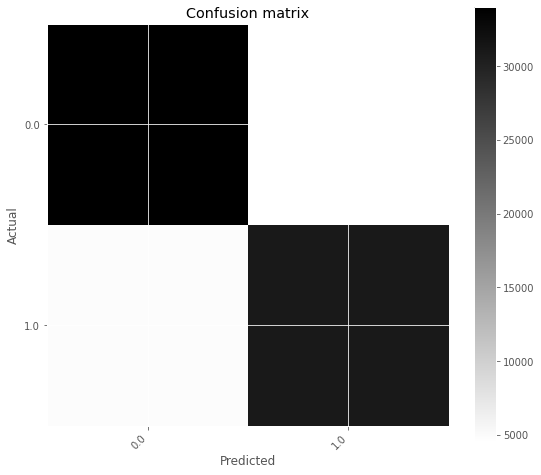

In [42]:
%matplotlib inline
import matplotlib

matplotlib.style.use("ggplot")
from pandas_confusion import ConfusionMatrix


def get_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top_a = coefs_with_fns[:n]
    top_b = coefs_with_fns[: -(n + 1) : -1]
    return top_a, top_b


vect = vectorizer
y_pred = y_test_pred

top_a, top_b = get_most_informative_features(vect, clf0, 100)
top_a_df = pd.DataFrame(top_a)
top_a_df.columns = ["coef", "term"]
top_b_df = pd.DataFrame(top_b)
top_b_df.columns = ["coef", "term"]

top_a_df.to_csv("./reports/url_uk_top100_soft.csv", index=False)
top_b_df.to_csv("./reports/url_uk_top100_hard.csv", index=False)

y_test_df = pd.DataFrame(test_df["soft_news"], columns=["actual"]).reset_index(
    drop=True
)
y_test_df["predicted"] = y_pred
y_test_df.to_csv("./tests/url_uk_test_prediction.csv", index=False)

y_true = test_df["soft_news"].values
confusion_matrix = ConfusionMatrix(y_true, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix)

confusion_matrix.plot()

from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_true, y_pred)
conf_df = pd.DataFrame(conf)
conf_df.columns = clf.classes_
conf_df.index = clf.classes_
conf_df.to_csv(
    "./reports/url_uk_test_confusion_matrix.csv", index_label=r"actual \ predicted"
)
print(conf_df)

### Proportion of Hard and Soft

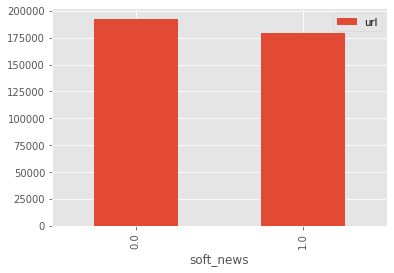

In [43]:
sdf.groupby(["soft_news"]).agg({"url": "count"}).plot(kind="bar")